In [15]:
# Cosmic Web Analysis: Spectroscopic vs Photometric Comparison
# Team:Jenna Shuffelton, Valeria Lopez, Celine Mayer
# Question: Does the spectroscopic sample miss cosmic structures due to selection bias?
# We want: Compare SDSS spectroscopic and photometric galaxy samples to investigate
# whether selection bias causes us to miss large-scale structures (filaments, voids, clusters)

In [16]:
## Our Sky Region (values in the proposal!)

#RA:180 to 185 (5 degree width) -- degrees
#Dec: 30 to 35 (5 degree height) -- degrees
#Redshift 0.02 < z < 0.30

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install astro-datalab
from dl import queryClient as qc
from astropy.cosmology import Planck18 as cosmo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 966.4/966.4 kB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.7/139.7 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.3/350.3 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 4.3 MB/s eta 0:00:00


In [5]:
#region parameters
ra_min = 180.0
ra_max = 185.0
dec_min = 30.0
dec_max = 35.0
z_min = 0.02
z_max = 0.30

print(f"RA range:  {ra_min} to {ra_max} degrees (width: {ra_max - ra_min} degrees)")
print(f"Dec range: {dec_min} to {dec_max} degrees (height: {dec_max - dec_min} degrees)")
print(f"Redshift:  {z_min} to {z_max}\n")
print(f"Sky area: {(ra_max - ra_min) * (dec_max - dec_min)} square degrees")

RA range:  180.0 to 185.0 degrees (width: 5.0 degrees)
Dec range: 30.0 to 35.0 degrees (height: 5.0 degrees)
Redshift:  0.02 to 0.3

Sky area: 25.0 square degrees


In [6]:
#Spectroscopic Data Collection
#Jenna, I think you wanted to work on this?
## Query SDSS DR17 specObj table to get galaxies w their accurate spectroscopic redshifts
##git has the examples for this

## i did some research and for this section we need this -- feel free to delete or add if i missed something:

#1. Query SDSS spectroscopic catalog
#2. Filter for galaxies in our sky region
#3. Remove bad redshifts
#4. Save data to CSV
#5. Create basic plots

In [7]:
# Spectroscopic query
query_spec = f"""
SELECT
    s.ra,
    s.dec,
    s.z,
    s.zerr,
    s.class,
    s.specobjid
FROM sdss_dr17.specobj AS s
WHERE
    s.ra BETWEEN {ra_min} AND {ra_max}
    AND s.dec BETWEEN {dec_min} AND {dec_max}
    AND s.z BETWEEN {z_min} AND {z_max}
    AND s.class = 'GALAXY'
    AND s.zwarning = 0
"""
print("Spectroscopic query ready.")
print("Run with: spec_data = qc.query(sql=query_spec, fmt='pandas')")

Spectroscopic query ready.
Run with: spec_data = qc.query(sql=query_spec, fmt='pandas')


In [8]:
# like in the git, test query with limit 100
spec_data_test = qc.query(sql=query_spec, fmt='pandas')
print("Galaxies retrieved", len(spec_data_test))
print("First 5 entries")
print(spec_data_test.head())

Galaxies retrieved 2415
First 5 entries
          ra        dec         z      zerr   class            specobjid
0  180.40698  30.003892  0.164183  0.000035  GALAXY  2505266993263831040
1  180.49896  30.004638  0.071869  0.000020  GALAXY  2508591093285677056
2  180.75047  30.007559  0.127590  0.000024  GALAXY  2505277988380108800
3  181.10918  30.004950  0.079258  0.000033  GALAXY  2508579548413585408
4  180.07069  30.035298  0.151829  0.000019  GALAXY  2505264519362668544


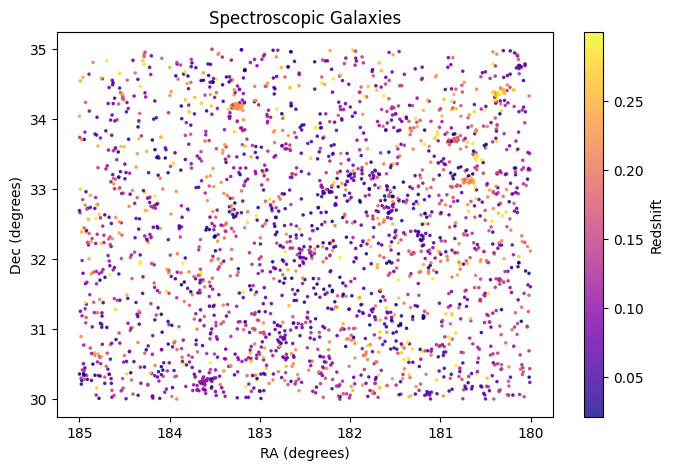

In [9]:
# Simple visualization of test data

plt.figure(figsize=(8, 5))
plt.scatter(spec_data_test['ra'],spec_data_test['dec'],c=spec_data_test['z'], s=2.5, alpha=0.8, cmap='plasma')

plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.title('Spectroscopic Galaxies')
plt.colorbar(label='Redshift')
plt.gca().invert_xaxis()
plt.show()

In [10]:
#Photometric Query
query_photo = f"""
SELECT
    l.ra,
    l.dec,
    l.type,
    l.ls_id,
    l.mag_r,
    l.mag_g,
    l.mag_z,
    l.mag_i,
    l.shape_r,
    l.sersic
FROM ls_dr10.tractor AS l
WHERE
    l.ra BETWEEN {ra_min} AND {ra_max}
    AND l.dec BETWEEN {dec_min} AND {dec_max}
    AND l.type != 'PSF'  -- exclude stars
    AND l.mag_r < 22.0
    AND l.mag_r > 14.0
LIMIT 10000
"""

print("Photometric query ready.")
print(f"Run with: photo_data = qc.query(sql=query_photo, fmt='pandas')")

Photometric query ready.
Run with: photo_data = qc.query(sql=query_photo, fmt='pandas')


In [11]:
# like in the git, test query with limit 100
photo_data = qc.query(sql=query_photo, fmt='pandas')
print(f"Photometric galaxies retrieved: {len(photo_data)}")
print("First 5 entries:")
print(photo_data.head())

Photometric galaxies retrieved: 10000
First 5 entries:
           ra        dec type              ls_id      mag_r      mag_g  \
0  180.020120  30.000292  EXP  10995636693369212  21.827425  22.593670   
1  180.007851  30.003517  DEV  10995636693368995  18.240868  19.341526   
2  180.039613  30.002668  DEV  10995636693369582  18.160702  19.086380   
3  180.033216  30.010361  REX  10995636693369453  21.867355  23.330849   
4  180.035501  30.007932  REX  10995636693369499  20.480803  21.929708   

       mag_z      mag_i   shape_r  sersic  
0  21.481842  21.596865  0.633300     1.0  
1  17.561504  17.865276  1.061211     4.0  
2  17.509697  17.787430  3.598927     4.0  
3  20.574919  21.077847  0.481297     1.0  
4  19.639025  19.997984  0.331723     1.0  


In [22]:
query_crossmatch = f"""
SELECT
    l.ra AS photo_ra,
    l.dec AS photo_dec,
    l.type,
    l.ls_id,
    l.mag_r,
    l.mag_g,
    l.mag_z,
    l.mag_i,
    l.shape_r,
    l.sersic,
    l.g_r,  -- pre-computed color
    l.r_z,  -- pre-computed color
    s.ra AS spec_ra,
    s.dec AS spec_dec,
    s.z AS redshift,
    s.zerr AS redshift_err,
    s.class,
    s.specobjid
FROM ls_dr10.tractor AS l
JOIN ls_dr10.x1p5__tractor__sdss_dr17__specobj AS x ON l.ls_id = x.id1
JOIN sdss_dr17.specobj AS s ON x.id2 = s.specobjid
WHERE
    l.ra BETWEEN {ra_min} AND {ra_max}
    AND l.dec BETWEEN {dec_min} AND {dec_max}
    AND s.z BETWEEN {z_min} AND {z_max}
    AND s.class = 'GALAXY'
    AND s.zwarning = 0
    AND l.type != 'PSF'
LIMIT 5000
"""

In [24]:
# Execute the cross-match query
crossmatched_data = qc.query(sql=query_crossmatch, fmt='pandas')
print(f"number of cross-matched galaxies {len(crossmatched_data)}")
print("\nfirst 5 entries:")
print(crossmatched_data[['photo_ra', 'photo_dec', 'redshift', 'mag_r', 'type']].head())

number of cross-matched galaxies 2646

first 5 entries:
     photo_ra  photo_dec  redshift      mag_r type
0  180.242805  30.058397  0.121562  17.510456  SER
1  180.070686  30.035330  0.151829  16.744291  REX
2  180.121540  30.068021  0.117759  17.413435  SER
3  180.423808  30.336083  0.079638  17.216593  SER
4  180.506841  30.061719  0.080946  17.725190  SER


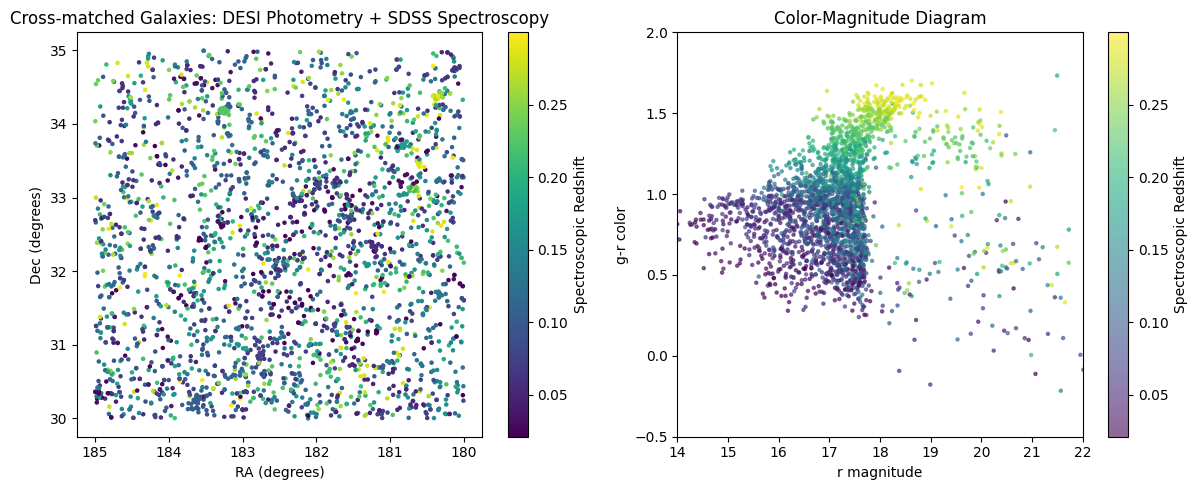

In [21]:
##############################################
#cross-matched data with photometry colors and spectroscopic redshifts
##############################################

plt.figure(figsize=(12, 5))

#the spatial distribution colored by redshift
plt.subplot(1, 2, 1)
plt.scatter(crossmatched_data['photo_ra'], crossmatched_data['photo_dec'],s=5, c=crossmatched_data['redshift'], cmap='viridis')
plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.title('Cross-matched Galaxies: DESI Photometry + SDSS Spectroscopy')
plt.colorbar(label='Spectroscopic Redshift')
plt.gca().invert_xaxis()




# Right panel: Color-magnitude diagram
plt.subplot(1, 2, 2)
plt.scatter(crossmatched_data['mag_r'],
           crossmatched_data['g_r'],
           c=crossmatched_data['redshift'],
           s=5,
           alpha=0.6,
           cmap='viridis')
plt.xlabel('r magnitude')
plt.ylabel('g-r color')
plt.title('Color-Magnitude Diagram')
plt.colorbar(label='spectroscopic Redshift')
plt.xlim(14, 22)
plt.ylim(-0.5, 2.0)
plt.tight_layout()
plt.show()

In [14]:
#this is cool bc we get to see if the properties of the  galaxies change with distance

In [ ]:
#next: 1) we need to delect the redshift slices for large-scale structure
#2)3d view of the cosmic web
#3) analyze cluseting in redishift slice
#4)add cosmic slime matter density